##  Data cleaning

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## step 1 : Load the dataset

In [4]:
df = pd.read_csv("LiverPatientDataset(LPD).csv", encoding='utf-8')  # Try UTF-8 first (just in case

## Inspect the Dataset 

In [7]:

df.head(10)

,Age of the patient,Gender of the patient,Total Bilirubin,Direct Bilirubin,ﾠAlkphos Alkaline Phosphotase,ﾠSgpt Alamine Aminotransferase,Sgot Aspartate Aminotransferase,Total Protiens,ﾠALB Albumin,A/G Ratio Albumin and Globulin Ratio,Result
0,65.0,Female,0.7,0.1,187.0,16.0,18.0,6.8,3.3,0.90,1
1,62.0,Male,10.9,5.5,699.0,64.0,100.0,7.5,3.2,0.74,1
2,62.0,Male,7.3,4.1,490.0,60.0,68.0,7.0,3.3,0.89,1
3,58.0,Male,1.0,0.4,182.0,14.0,20.0,6.8,3.4,1.00,1
4,72.0,Male,3.9,2.0,195.0,27.0,59.0,7.3,2.4,0.40,1
5,46.0,Male,1.8,0.7,208.0,19.0,14.0,7.6,4.4,1.30,1
6,26.0,Female,0.9,0.2,154.0,NaN,12.0,7.0,3.5,1.00,1
7,29.0,Female,0.9,0.3,202.0,14.0,11.0,6.7,3.6,1.10,1
8,17.0,Male,0.9,0.3,202.0,22.0,19.0,7.4,4.1,1.20,2
9,55.0,Male,0.7,0.2,290.0,53.0,58.0,6.8,3.4,1.00,1


In [8]:

print("\n Data Info")
df.info()


 Data Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30691 entries, 0 to 30690
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Age of the patient                    30689 non-null  float64
 1   Gender of the patient                 29789 non-null  object 
 2   Total Bilirubin                       30043 non-null  float64
 3   Direct Bilirubin                      30130 non-null  float64
 4   ﾠAlkphos Alkaline Phosphotase         29895 non-null  float64
 5   ﾠSgpt Alamine Aminotransferase        30153 non-null  float64
 6   Sgot Aspartate Aminotransferase       30229 non-null  float64
 7   Total Protiens                        30228 non-null  float64
 8   ﾠALB Albumin                          30197 non-null  float64
 9   A/G Ratio Albumin and Globulin Ratio  30132 non-null  float64
 10  Result                                30691 non-null  int64  
dtypes: 

In [9]:
print("\n Missing values")
df.isnull().sum()


 Missing values


Age of the patient                        2
Gender of the patient                   902
Total Bilirubin                         648
Direct Bilirubin                        561
ﾠAlkphos Alkaline Phosphotase           796
ﾠSgpt Alamine Aminotransferase          538
Sgot Aspartate Aminotransferase         462
Total Protiens                          463
ﾠALB Albumin                            494
A/G Ratio Albumin and Globulin Ratio    559
Result                                    0
dtype: int64

In [10]:
print("\nDuplicate Rows:", df.duplicated().sum())


Duplicate Rows: 11323


## step 2 : Handle Missing Values

In [11]:
df["A/G Ratio Albumin and Globulin Ratio"] =df['A/G Ratio Albumin and Globulin Ratio'].fillna (df['A/G Ratio Albumin and Globulin Ratio'].mean())

##  Replacing numerical vlaues with median

In [12]:
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

for col in numerical_columns:
    if df[col].isnull().sum() > 0:
        df[col].fillna(df[col].median(),inplace=True)
        


C:\Users\sohai\AppData\Local\Temp\ipykernel_6948\1763882409.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(),inplace=True)
C:\Users\sohai\AppData\Local\Temp\ipykernel_6948\1763882409.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example,

##  Replace missing values for categorical columns with the mode

In [13]:
categorical_columns = df.select_dtypes(include=['object']).columns
for col in categorical_columns:
    if df[col].isnull().sum() > 0:
        df[col].fillna(df[col].mode()[0], inplace=True)

C:\Users\sohai\AppData\Local\Temp\ipykernel_6948\394296456.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


In [14]:
df.isna().sum()

Age of the patient                      0
Gender of the patient                   0
Total Bilirubin                         0
Direct Bilirubin                        0
ﾠAlkphos Alkaline Phosphotase           0
ﾠSgpt Alamine Aminotransferase          0
Sgot Aspartate Aminotransferase         0
Total Protiens                          0
ﾠALB Albumin                            0
A/G Ratio Albumin and Globulin Ratio    0
Result                                  0
dtype: int64

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30691 entries, 0 to 30690
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Age of the patient                    30691 non-null  float64
 1   Gender of the patient                 30691 non-null  object 
 2   Total Bilirubin                       30691 non-null  float64
 3   Direct Bilirubin                      30691 non-null  float64
 4   ﾠAlkphos Alkaline Phosphotase         30691 non-null  float64
 5   ﾠSgpt Alamine Aminotransferase        30691 non-null  float64
 6   Sgot Aspartate Aminotransferase       30691 non-null  float64
 7   Total Protiens                        30691 non-null  float64
 8   ﾠALB Albumin                          30691 non-null  float64
 9   A/G Ratio Albumin and Globulin Ratio  30691 non-null  float64
 10  Result                                30691 non-null  int64  
dtypes: float64(9), 

## step 3 : drop duplicates

In [16]:
# Step 3: Remove Duplicates
# df.duplicated().sum()
df.drop_duplicates(inplace=True)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19088 entries, 0 to 30689
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Age of the patient                    19088 non-null  float64
 1   Gender of the patient                 19088 non-null  object 
 2   Total Bilirubin                       19088 non-null  float64
 3   Direct Bilirubin                      19088 non-null  float64
 4   ﾠAlkphos Alkaline Phosphotase         19088 non-null  float64
 5   ﾠSgpt Alamine Aminotransferase        19088 non-null  float64
 6   Sgot Aspartate Aminotransferase       19088 non-null  float64
 7   Total Protiens                        19088 non-null  float64
 8   ﾠALB Albumin                          19088 non-null  float64
 9   A/G Ratio Albumin and Globulin Ratio  19088 non-null  float64
 10  Result                                19088 non-null  int64  
dtypes: float64(9), int64

In [18]:
df.duplicated().sum()

0

## step 4 : Check datatypes and convert if necessary

In [19]:
print("\nData Types Before Conversion:")
print(df.dtypes)


Data Types Before Conversion:
Age of the patient                      float64
Gender of the patient                    object
Total Bilirubin                         float64
Direct Bilirubin                        float64
ﾠAlkphos Alkaline Phosphotase           float64
ﾠSgpt Alamine Aminotransferase          float64
Sgot Aspartate Aminotransferase         float64
Total Protiens                          float64
ﾠALB Albumin                            float64
A/G Ratio Albumin and Globulin Ratio    float64
Result                                    int64
dtype: object


## step 5 : handle outliers

C:\Users\sohai\AppData\Local\Temp\ipykernel_6948\3333531112.py:21: UserWarning: Glyph 65440 (\N{HALFWIDTH HANGUL FILLER}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\sohai\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 65440 (\N{HALFWIDTH HANGUL FILLER}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


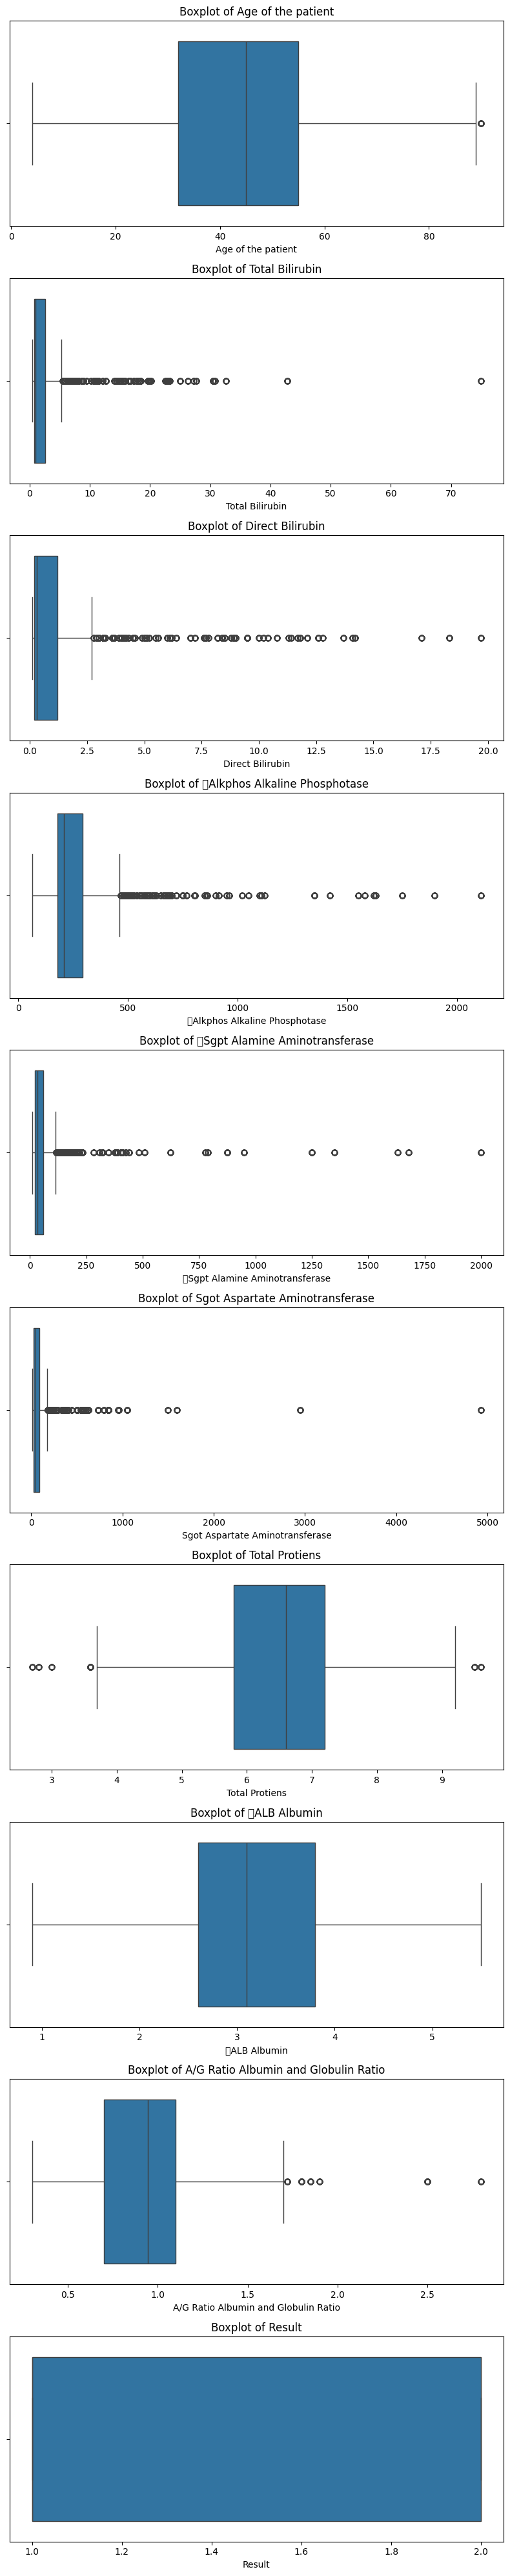

In [24]:
# # Step 5: Handle Outliers
# # Visualize outliers using boxplots
# for col in numerical_columns:
#     plt.figure(figsize=(8, 4))
#     sns.boxplot(x=df[col])
#     plt.title(f"Boxplot of {col}")
#     plt.show()
    
    
    
import matplotlib.pyplot as plt
import seaborn as sns

# Set up subplots for better visualization
fig, axes = plt.subplots(nrows=len(numerical_columns), figsize=(8, 4 * len(numerical_columns)))

for ax, col in zip(axes, numerical_columns):
    sns.boxplot(x=df[col], ax=ax)
    ax.set_title(f"Boxplot of {col}")

plt.tight_layout()
plt.show()



In [40]:
# Cap or remove outliers (use the 1.5 IQR rule)
for col in numerical_columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
    df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])

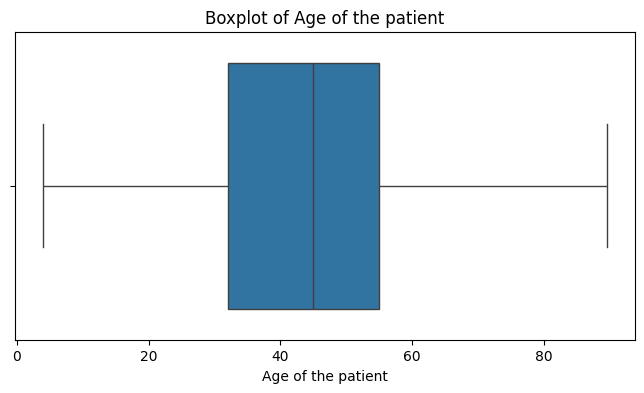

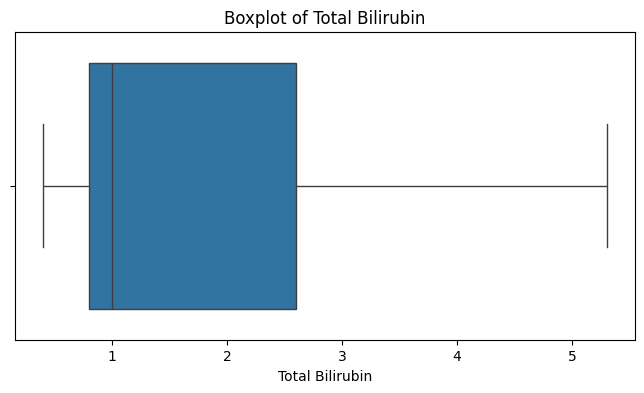

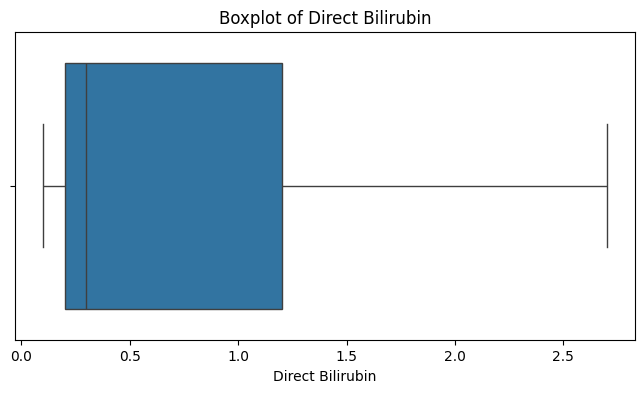

C:\Users\sohai\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 65440 (\N{HALFWIDTH HANGUL FILLER}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


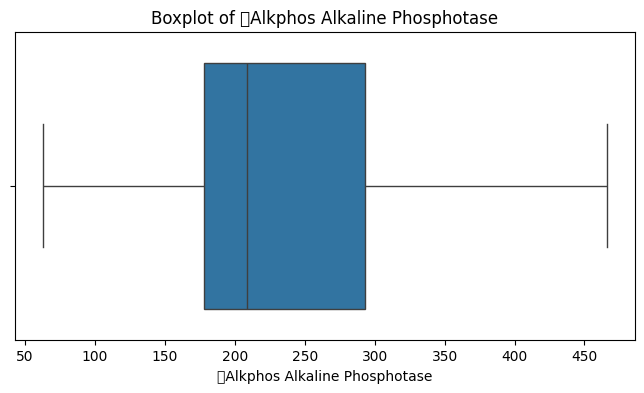

C:\Users\sohai\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 65440 (\N{HALFWIDTH HANGUL FILLER}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


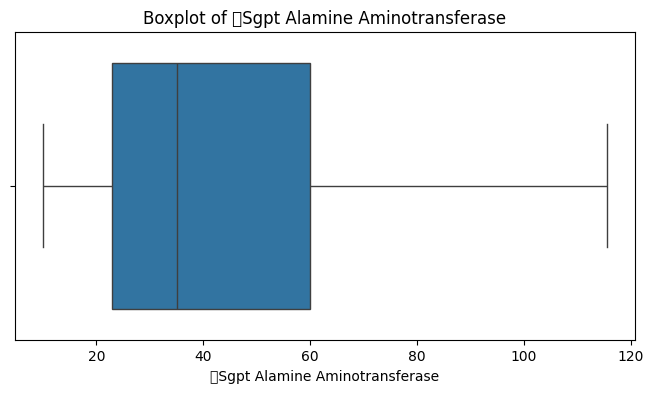

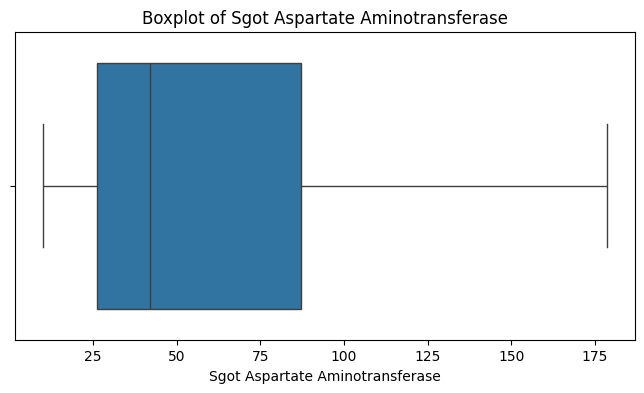

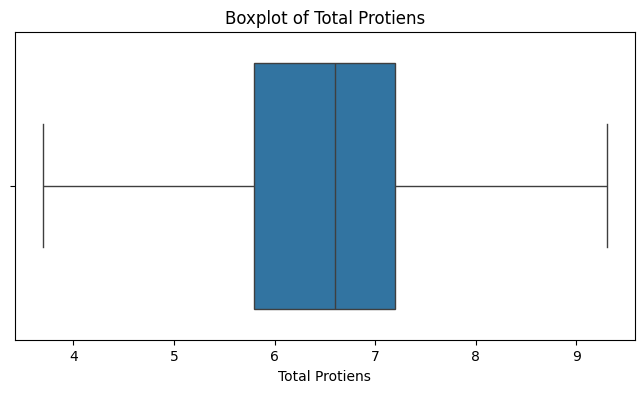

C:\Users\sohai\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 65440 (\N{HALFWIDTH HANGUL FILLER}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


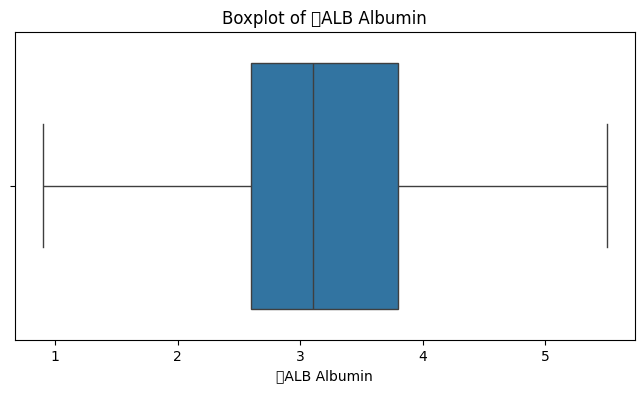

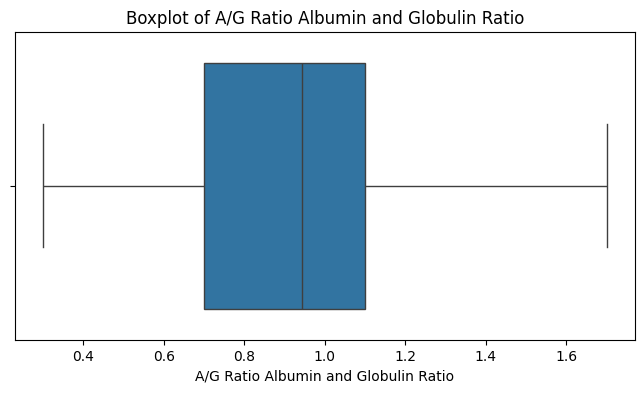

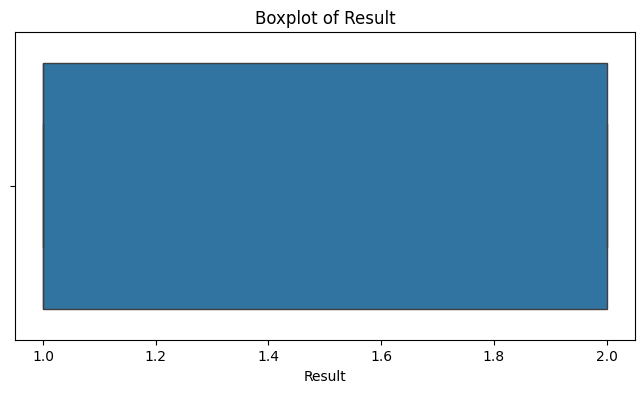

In [41]:
# Visualize outliers using boxplots
for col in numerical_columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

## # Step 7: Normalize/Scale Numerical Data

In [17]:
# from sklearn.preprocessing import StandardScaler

# scaler = StandardScaler()
# df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

## step 8 : save the cleaned dataset

In [42]:
# Step 8: Save the Cleaned Dataset
cleaned_file_path = r'C:\Users\sohai\Desktop\CapStoneproject\Cleaned_LiverPatientDataset.csv'
df.to_csv(cleaned_file_path, index=False)
print(f"\nCleaned dataset saved to: {cleaned_file_path}")


Cleaned dataset saved to: C:\Users\sohai\Desktop\CapStoneproject\Cleaned_LiverPatientDataset.csv


# Exploratory Data Analysis

In [18]:
df.head()

,Age of the patient,Gender of the patient,Total Bilirubin,Direct Bilirubin,ﾠAlkphos Alkaline Phosphotase,ﾠSgpt Alamine Aminotransferase,Sgot Aspartate Aminotransferase,Total Protiens,ﾠALB Albumin,A/G Ratio Albumin and Globulin Ratio,Result
0,65.0,Female,0.7,0.1,187.0,16.0,18.0,6.8,3.3,0.90,1.0
1,62.0,Male,5.3,2.7,467.0,64.0,100.0,7.5,3.2,0.74,1.0
2,62.0,Male,5.3,2.7,467.0,60.0,68.0,7.0,3.3,0.89,1.0
3,58.0,Male,1.0,0.4,182.0,14.0,20.0,6.8,3.4,1.00,1.0
4,72.0,Male,3.9,2.0,195.0,27.0,59.0,7.3,2.4,0.40,1.0


In [19]:
df.isna().sum()


Age of the patient                      0
Gender of the patient                   0
Total Bilirubin                         0
Direct Bilirubin                        0
ﾠAlkphos Alkaline Phosphotase           0
ﾠSgpt Alamine Aminotransferase          0
Sgot Aspartate Aminotransferase         0
Total Protiens                          0
ﾠALB Albumin                            0
A/G Ratio Albumin and Globulin Ratio    0
Result                                  0
dtype: int64

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19083 entries, 0 to 30689
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Age of the patient                    19083 non-null  float64
 1   Gender of the patient                 19083 non-null  object 
 2   Total Bilirubin                       19083 non-null  float64
 3   Direct Bilirubin                      19083 non-null  float64
 4   ﾠAlkphos Alkaline Phosphotase         19083 non-null  float64
 5   ﾠSgpt Alamine Aminotransferase        19083 non-null  float64
 6   Sgot Aspartate Aminotransferase       19083 non-null  float64
 7   Total Protiens                        19083 non-null  float64
 8   ﾠALB Albumin                          19083 non-null  float64
 9   A/G Ratio Albumin and Globulin Ratio  19083 non-null  float64
 10  Result                                19083 non-null  float64
dtypes: float64(10), obje

Number of patients diagnosed with liver disease :  13609
Number of patients diagnosed without liver disease :  5474


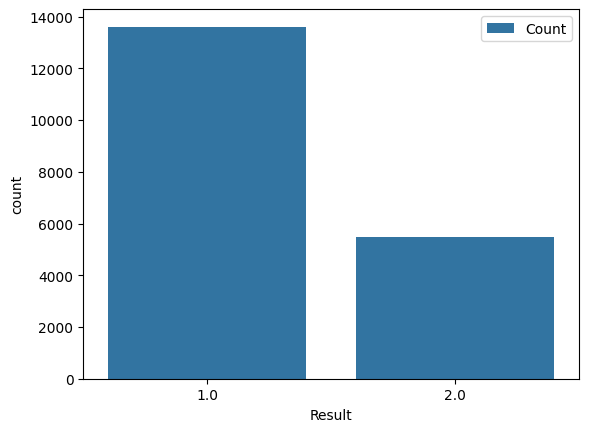

Number of Patients that are Male : 21986
Number of Patients that are Female : 7803


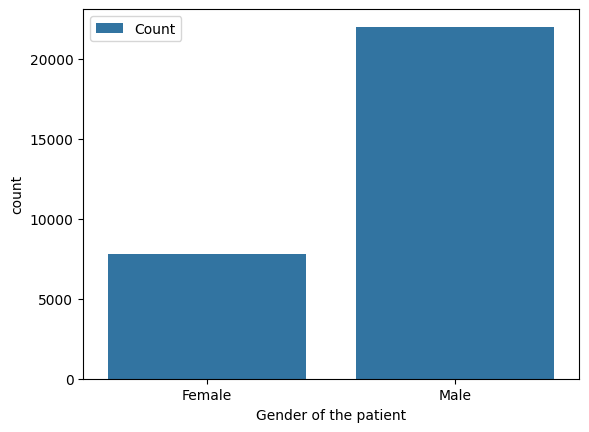

In [36]:
# plotting the number of male and female pateints 

sns.countplot(data=df,x='Gender of the patient',label='Count')
M,F = df['Gender of the patient'].value_counts()
print("Number of Patients that are Male :",M)
print("Number of Patients that are Female :",F)

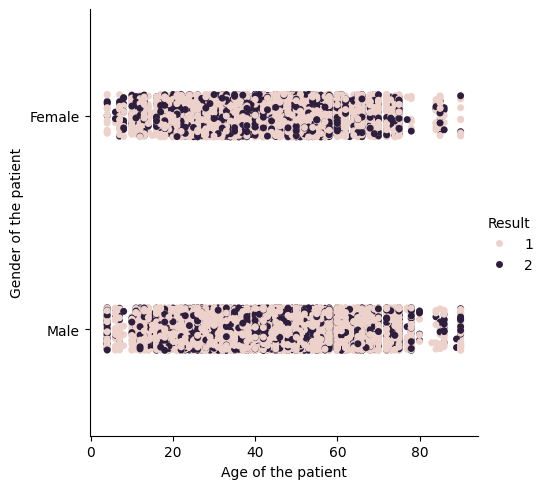

In [37]:
# Plotting patient Age vs Gender 
sns.catplot(x="Age of the patient",y="Gender of the patient",hue='Result',data=df)

In [38]:
# Mean Age of the Patients 
df[['Gender of the patient', 'Result','Age of the patient']]\
.groupby(['Result','Gender of the patient'], as_index=False).mean().\
sort_values(by='Result', ascending=False)

,Result,Gender of the patient,Age of the patient
3,2,Male,44.309737
2,2,Female,43.068889
1,1,Male,44.502097
0,1,Female,43.291014


Text(0.5, 0.98, 'Disease by Gender and Age')

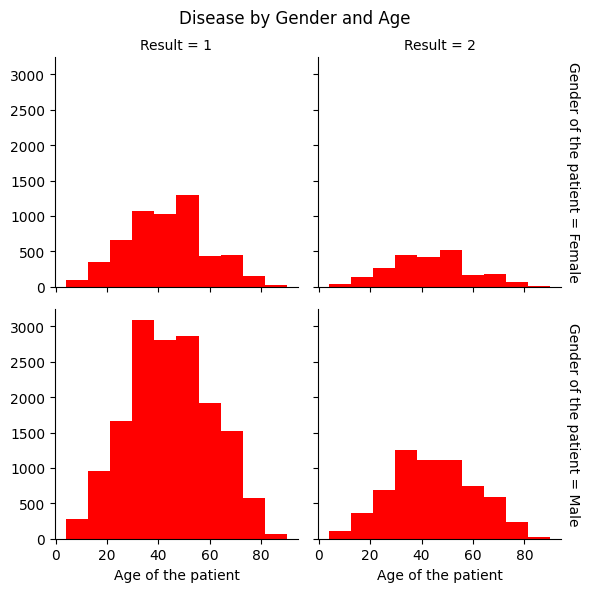

In [39]:
# Plotting Age vs Gender 
g = sns.FacetGrid(df,col="Result",row="Gender of the patient",margin_titles=True)
g.map(plt.hist, "Age of the patient", color="red")
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Disease by Gender and Age')

# This is particularly useful for:

# Comparing distributions across categories.
# Exploring interactions between categorical and numerical variables.
# Breaking down complex relationships into smaller, more digestible pieces.


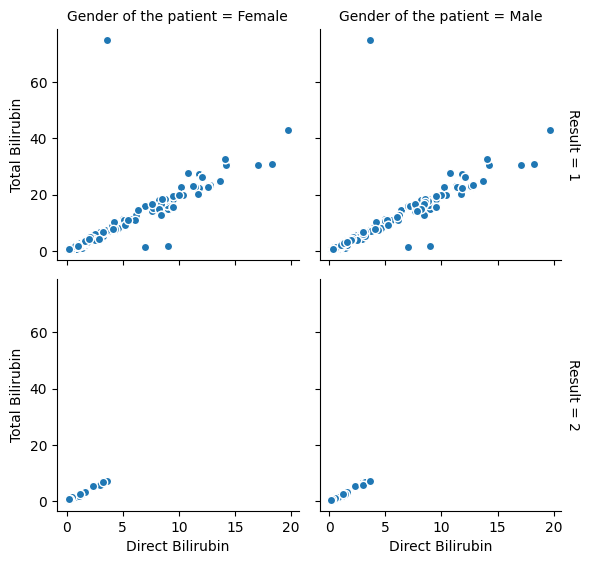

In [40]:
# Plotting Gender(Male/Female) along with Total_Bilirubin and Direct_Bilirubin
g = sns.FacetGrid(df, col="Gender of the patient", row="Result", margin_titles=True)
g.map(plt.scatter,"Direct Bilirubin", "Total Bilirubin", edgecolor="w")
plt.subplots_adjust(top=0.9)

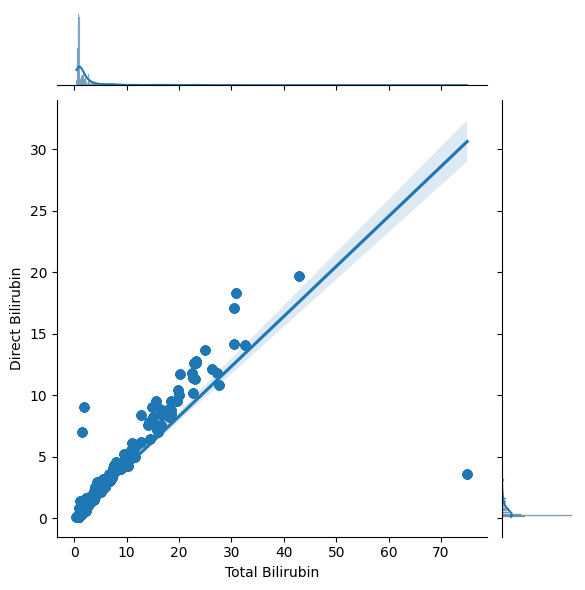

In [41]:
# Plotting Total_Bilirubin vs Direct_Bilirubin
import seaborn as sns
import matplotlib.pyplot as plt

# Joint plot of Total Bilirubin vs Direct Bilirubin
sns.jointplot(x="Total Bilirubin", y="Direct Bilirubin", data=df, kind="reg")

# Show the plot
plt.show()


In [42]:
df.head(7)

,Age of the patient,Gender of the patient,Total Bilirubin,Direct Bilirubin,ﾠAlkphos Alkaline Phosphotase,ﾠSgpt Alamine Aminotransferase,Sgot Aspartate Aminotransferase,Total Protiens,ﾠALB Albumin,A/G Ratio Albumin and Globulin Ratio,Result
0,65.0,Female,0.7,0.1,187.0,16.0,18.0,6.8,3.3,0.90,1
1,62.0,Male,10.9,5.5,699.0,64.0,100.0,7.5,3.2,0.74,1
2,62.0,Male,7.3,4.1,490.0,60.0,68.0,7.0,3.3,0.89,1
3,58.0,Male,1.0,0.4,182.0,14.0,20.0,6.8,3.4,1.00,1
4,72.0,Male,3.9,2.0,195.0,27.0,59.0,7.3,2.4,0.40,1
5,46.0,Male,1.8,0.7,208.0,19.0,14.0,7.6,4.4,1.30,1
6,26.0,Female,0.9,0.2,154.0,NaN,12.0,7.0,3.5,1.00,1


In [44]:
pd.get_dummies(df['Gender of the patient'], prefix='Gender of the patient', dtype=int).head()


,Gender of the patient_Female,Gender of the patient_Male
0,1,0
1,0,1
2,0,1
3,0,1
4,0,1


In [45]:
# concat 
df = pd.concat([df,pd.get_dummies(df["Gender of the patient"],prefix='Gender of the patient',dtype=int)],axis=1)

In [46]:
df

,Age of the patient,Gender of the patient,Total Bilirubin,Direct Bilirubin,ﾠAlkphos Alkaline Phosphotase,ﾠSgpt Alamine Aminotransferase,Sgot Aspartate Aminotransferase,Total Protiens,ﾠALB Albumin,A/G Ratio Albumin and Globulin Ratio,Result,Gender of the patient_Female,Gender of the patient_Male
0,65.0,Female,0.7,0.1,187.0,16.0,18.0,6.8,3.3,0.90,1,1,0
1,62.0,Male,10.9,5.5,699.0,64.0,100.0,7.5,3.2,0.74,1,0,1
2,62.0,Male,7.3,4.1,490.0,60.0,68.0,7.0,3.3,0.89,1,0,1
3,58.0,Male,1.0,0.4,182.0,14.0,20.0,6.8,3.4,1.00,1,0,1
4,72.0,Male,3.9,2.0,195.0,27.0,59.0,7.3,2.4,0.40,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
30686,50.0,Male,2.2,1.0,610.0,17.0,28.0,7.3,2.6,0.55,1,0,1
30687,55.0,Male,2.9,1.3,482.0,22.0,34.0,7.0,2.4,0.50,1,0,1
30688,54.0,Male,6.8,3.0,542.0,116.0,66.0,6.4,3.1,0.90,1,0,1
30689,48.0,Female,1.9,1.0,231.0,16.0,55.0,4.3,1.6,0.60,1,1,0


In [50]:
# Drop a single column
df = df.drop('Gender of the patient', axis=1)  # Replace 'ColumnName' with the name of the column to drop


In [51]:
df.describe()

,Age of the patient,Total Bilirubin,Direct Bilirubin,ﾠAlkphos Alkaline Phosphotase,ﾠSgpt Alamine Aminotransferase,Sgot Aspartate Aminotransferase,Total Protiens,ﾠALB Albumin,A/G Ratio Albumin and Globulin Ratio,Result,Gender of the patient_Female,Gender of the patient_Male
count,30689.000000,30043.000000,30130.000000,29895.000000,30153.000000,30229.000000,30228.000000,30197.000000,30132.000000,30691.000000,30691.000000,30691.000000
mean,44.107205,3.370319,1.528042,289.075364,81.488641,111.469979,6.480237,3.130142,0.943467,1.285882,0.254244,0.716366
std,15.981043,6.255522,2.869592,238.537589,182.158850,280.851078,1.081980,0.792281,0.323164,0.451841,0.435442,0.450768
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000,0.000000,0.000000
25%,32.000000,0.800000,0.200000,175.000000,23.000000,26.000000,5.800000,2.600000,0.700000,1.000000,0.000000,0.000000
50%,45.000000,1.000000,0.300000,209.000000,35.000000,42.000000,6.600000,3.100000,0.900000,1.000000,0.000000,1.000000
75%,55.000000,2.700000,1.300000,298.000000,62.000000,88.000000,7.200000,3.800000,1.100000,2.000000,1.000000,1.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000,1.000000,1.000000


In [52]:
# returning null values of the  A/G ration of albumin and globulin
df[df['A/G Ratio Albumin and Globulin Ratio'].isnull()]

,Age of the patient,Total Bilirubin,Direct Bilirubin,ﾠAlkphos Alkaline Phosphotase,ﾠSgpt Alamine Aminotransferase,Sgot Aspartate Aminotransferase,Total Protiens,ﾠALB Albumin,A/G Ratio Albumin and Globulin Ratio,Result,Gender of the patient_Female,Gender of the patient_Male
209,45.0,0.9,0.3,189.0,23.0,33.0,6.6,3.9,NaN,1,1,0
241,51.0,0.8,0.2,230.0,24.0,46.0,6.5,3.1,NaN,1,0,1
253,35.0,0.6,0.2,180.0,12.0,15.0,5.2,2.7,NaN,2,1,0
312,27.0,1.3,0.6,106.0,25.0,54.0,8.5,4.8,NaN,2,0,1
792,73.0,0.9,0.3,189.0,23.0,33.0,6.6,3.9,NaN,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
30606,50.0,1.2,0.4,160.0,20.0,22.0,NaN,NaN,NaN,2,0,1
30607,70.0,0.6,0.1,196.0,29.0,30.0,NaN,NaN,NaN,1,0,1
30634,33.0,0.6,0.1,98.0,35.0,31.0,6.0,NaN,NaN,1,0,1
30635,65.0,0.8,0.2,245.0,48.0,49.0,6.4,NaN,NaN,1,0,1


In [54]:
df["A/G Ratio Albumin and Globulin Ratio"] =df['A/G Ratio Albumin and Globulin Ratio'].fillna (df['A/G Ratio Albumin and Globulin Ratio'].mean())

In [55]:
df[df['A/G Ratio Albumin and Globulin Ratio'].isnull()]

,Age of the patient,Total Bilirubin,Direct Bilirubin,ﾠAlkphos Alkaline Phosphotase,ﾠSgpt Alamine Aminotransferase,Sgot Aspartate Aminotransferase,Total Protiens,ﾠALB Albumin,A/G Ratio Albumin and Globulin Ratio,Result,Gender of the patient_Female,Gender of the patient_Male


In [ ]:
# in the above dataset 1 is having 2 is not having liver disease

X = df.drop(['Result'], axis=1)


y = df['Result']

In [60]:
liver_corr = X.corr()
liver_corr

,Age of the patient,Total Bilirubin,Direct Bilirubin,ﾠAlkphos Alkaline Phosphotase,ﾠSgpt Alamine Aminotransferase,Sgot Aspartate Aminotransferase,Total Protiens,ﾠALB Albumin,A/G Ratio Albumin and Globulin Ratio,Gender of the patient_Female,Gender of the patient_Male
Age of the patient,1.000000,-0.001600,-0.001521,-0.000761,0.000659,0.006104,-0.007951,-0.015164,-0.017887,-0.032162,0.033836
Total Bilirubin,-0.001600,1.000000,0.886987,0.197183,0.207893,0.240273,0.001185,-0.222522,-0.197317,-0.012446,0.013470
Direct Bilirubin,-0.001521,0.886987,1.000000,0.220954,0.222759,0.256200,0.006474,-0.229106,-0.188644,-0.011069,0.010978
ﾠAlkphos Alkaline Phosphotase,-0.000761,0.197183,0.220954,1.000000,0.124099,0.160690,-0.022321,-0.161060,-0.226649,-0.006365,0.009340
ﾠSgpt Alamine Aminotransferase,0.000659,0.207893,0.222759,0.124099,1.000000,0.783411,-0.041400,-0.026346,-0.002414,-0.003460,0.002105
Sgot Aspartate Aminotransferase,0.006104,0.240273,0.256200,0.160690,0.783411,1.000000,-0.024501,-0.083383,-0.066411,0.003971,-0.003812
Total Protiens,-0.007951,0.001185,0.006474,-0.022321,-0.041400,-0.024501,1.000000,0.775607,0.224289,-0.004995,0.005610
ﾠALB Albumin,-0.015164,-0.222522,-0.229106,-0.161060,-0.026346,-0.083383,0.775607,1.000000,0.677560,-0.004001,0.001115
A/G Ratio Albumin and Globulin Ratio,-0.017887,-0.197317,-0.188644,-0.226649,-0.002414,-0.066411,0.224289,0.677560,1.000000,-0.000686,-0.002278
Gender of the patient_Female,-0.032162,-0.012446,-0.011069,-0.006365,-0.003460,0.003971,-0.004995,-0.004001,-0.000686,1.000000,-0.927931


In [61]:
print("\n Duplicated Rows")
df.duplicated().sum()


 Duplicated Rows


np.int64(11323)

In [63]:
df.isna().sum()

Age of the patient                        2
Total Bilirubin                         648
Direct Bilirubin                        561
ﾠAlkphos Alkaline Phosphotase           796
ﾠSgpt Alamine Aminotransferase          538
Sgot Aspartate Aminotransferase         462
Total Protiens                          463
ﾠALB Albumin                            494
A/G Ratio Albumin and Globulin Ratio      0
Result                                    0
Gender of the patient_Female              0
Gender of the patient_Male                0
dtype: int64

In [ ]:
# Plotting Heatmaps for Correlations between all the features
plt.figure(figsize=(12,12))
sns.heatmap(liver_corr, cbar = True,  square = True, annot=True, fmt= '.2f', annot_kws={'size': 12}, cmap= 'coolwarm')
plt.title('Correlation between all the features')

## Handle Missing Values

C:\Users\sohai\AppData\Local\Temp\ipykernel_16876\4187809753.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(),inplace=True)
C:\Users\sohai\AppData\Local\Temp\ipykernel_16876\4187809753.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exampl

In [12]:
df.head(30)

,Age of the patient,Gender of the patient,Total Bilirubin,Direct Bilirubin,ﾠAlkphos Alkaline Phosphotase,ﾠSgpt Alamine Aminotransferase,Sgot Aspartate Aminotransferase,Total Protiens,ﾠALB Albumin,A/G Ratio Albumin and Globulin Ratio,Result
0,65.0,Female,0.7,0.1,187.0,16.0,18.0,6.8,3.3,0.90,1
1,62.0,Male,10.9,5.5,699.0,64.0,100.0,7.5,3.2,0.74,1
2,62.0,Male,7.3,4.1,490.0,60.0,68.0,7.0,3.3,0.89,1
3,58.0,Male,1.0,0.4,182.0,14.0,20.0,6.8,3.4,1.00,1
4,72.0,Male,3.9,2.0,195.0,27.0,59.0,7.3,2.4,0.40,1
5,46.0,Male,1.8,0.7,208.0,19.0,14.0,7.6,4.4,1.30,1
6,26.0,Female,0.9,0.2,154.0,35.0,12.0,7.0,3.5,1.00,1
7,29.0,Female,0.9,0.3,202.0,14.0,11.0,6.7,3.6,1.10,1
8,17.0,Male,0.9,0.3,202.0,22.0,19.0,7.4,4.1,1.20,2
9,55.0,Male,0.7,0.2,290.0,53.0,58.0,6.8,3.4,1.00,1


In [13]:
# Replace missing values for categorical columns with the mode 
categorical_columns = df.select_dtypes(include=['object', 'category']).columns
for col in categorical_columns:
    if df[col].isnull().sum() > 0:
        df[col].fillna(df[col].mode()[0],inplace=True)


C:\Users\sohai\AppData\Local\Temp\ipykernel_16876\3867304162.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0],inplace=True)


In [14]:
df.head(50)

,Age of the patient,Gender of the patient,Total Bilirubin,Direct Bilirubin,ﾠAlkphos Alkaline Phosphotase,ﾠSgpt Alamine Aminotransferase,Sgot Aspartate Aminotransferase,Total Protiens,ﾠALB Albumin,A/G Ratio Albumin and Globulin Ratio,Result
0,65.0,Female,0.7,0.1,187.0,16.0,18.0,6.8,3.3,0.90,1
1,62.0,Male,10.9,5.5,699.0,64.0,100.0,7.5,3.2,0.74,1
2,62.0,Male,7.3,4.1,490.0,60.0,68.0,7.0,3.3,0.89,1
3,58.0,Male,1.0,0.4,182.0,14.0,20.0,6.8,3.4,1.00,1
4,72.0,Male,3.9,2.0,195.0,27.0,59.0,7.3,2.4,0.40,1
5,46.0,Male,1.8,0.7,208.0,19.0,14.0,7.6,4.4,1.30,1
6,26.0,Female,0.9,0.2,154.0,35.0,12.0,7.0,3.5,1.00,1
7,29.0,Female,0.9,0.3,202.0,14.0,11.0,6.7,3.6,1.10,1
8,17.0,Male,0.9,0.3,202.0,22.0,19.0,7.4,4.1,1.20,2
9,55.0,Male,0.7,0.2,290.0,53.0,58.0,6.8,3.4,1.00,1


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30691 entries, 0 to 30690
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Age of the patient                    30691 non-null  float64
 1   Gender of the patient                 30691 non-null  object 
 2   Total Bilirubin                       30691 non-null  float64
 3   Direct Bilirubin                      30691 non-null  float64
 4   ﾠAlkphos Alkaline Phosphotase         30691 non-null  float64
 5   ﾠSgpt Alamine Aminotransferase        30691 non-null  float64
 6   Sgot Aspartate Aminotransferase       30691 non-null  float64
 7   Total Protiens                        30691 non-null  float64
 8   ﾠALB Albumin                          30691 non-null  float64
 9   A/G Ratio Albumin and Globulin Ratio  30691 non-null  float64
 10  Result                                30691 non-null  int64  
dtypes: float64(9), 

In [18]:
# step 3 : remove Duplicates 
df.drop_duplicates(inplace= True)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19083 entries, 0 to 30689
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Age of the patient                    19083 non-null  float64
 1   Gender of the patient                 19083 non-null  object 
 2   Total Bilirubin                       19083 non-null  float64
 3   Direct Bilirubin                      19083 non-null  float64
 4   ﾠAlkphos Alkaline Phosphotase         19083 non-null  float64
 5   ﾠSgpt Alamine Aminotransferase        19083 non-null  float64
 6   Sgot Aspartate Aminotransferase       19083 non-null  float64
 7   Total Protiens                        19083 non-null  float64
 8   ﾠALB Albumin                          19083 non-null  float64
 9   A/G Ratio Albumin and Globulin Ratio  19083 non-null  float64
 10  Result                                19083 non-null  int64  
dtypes: float64(9), int64

In [20]:
# step 4: check Data types and convert if Necessary
print("\n  data types before conversion : ")
print(df.dtypes)


  data types before conversion : 
Age of the patient                      float64
Gender of the patient                    object
Total Bilirubin                         float64
Direct Bilirubin                        float64
ﾠAlkphos Alkaline Phosphotase           float64
ﾠSgpt Alamine Aminotransferase          float64
Sgot Aspartate Aminotransferase         float64
Total Protiens                          float64
ﾠALB Albumin                            float64
A/G Ratio Albumin and Globulin Ratio    float64
Result                                    int64
dtype: object


In [21]:
df.head(10)

,Age of the patient,Gender of the patient,Total Bilirubin,Direct Bilirubin,ﾠAlkphos Alkaline Phosphotase,ﾠSgpt Alamine Aminotransferase,Sgot Aspartate Aminotransferase,Total Protiens,ﾠALB Albumin,A/G Ratio Albumin and Globulin Ratio,Result
0,65.0,Female,0.7,0.1,187.0,16.0,18.0,6.8,3.3,0.90,1
1,62.0,Male,10.9,5.5,699.0,64.0,100.0,7.5,3.2,0.74,1
2,62.0,Male,7.3,4.1,490.0,60.0,68.0,7.0,3.3,0.89,1
3,58.0,Male,1.0,0.4,182.0,14.0,20.0,6.8,3.4,1.00,1
4,72.0,Male,3.9,2.0,195.0,27.0,59.0,7.3,2.4,0.40,1
5,46.0,Male,1.8,0.7,208.0,19.0,14.0,7.6,4.4,1.30,1
6,26.0,Female,0.9,0.2,154.0,35.0,12.0,7.0,3.5,1.00,1
7,29.0,Female,0.9,0.3,202.0,14.0,11.0,6.7,3.6,1.10,1
8,17.0,Male,0.9,0.3,202.0,22.0,19.0,7.4,4.1,1.20,2
9,55.0,Male,0.7,0.2,290.0,53.0,58.0,6.8,3.4,1.00,1


In [22]:
# step 5 : handle outlier 
df.tail(5)

,Age of the patient,Gender of the patient,Total Bilirubin,Direct Bilirubin,ﾠAlkphos Alkaline Phosphotase,ﾠSgpt Alamine Aminotransferase,Sgot Aspartate Aminotransferase,Total Protiens,ﾠALB Albumin,A/G Ratio Albumin and Globulin Ratio,Result
29974,58.0,Male,2.9,1.3,482.0,22.0,34.0,7.0,2.4,0.50,1
29976,28.0,Male,1.9,1.0,231.0,16.0,55.0,4.3,1.6,0.60,1
30686,50.0,Male,2.2,1.0,610.0,17.0,28.0,7.3,2.6,0.55,1
30688,54.0,Male,6.8,3.0,542.0,116.0,66.0,6.4,3.1,0.90,1
30689,48.0,Female,1.9,1.0,231.0,16.0,55.0,4.3,1.6,0.60,1


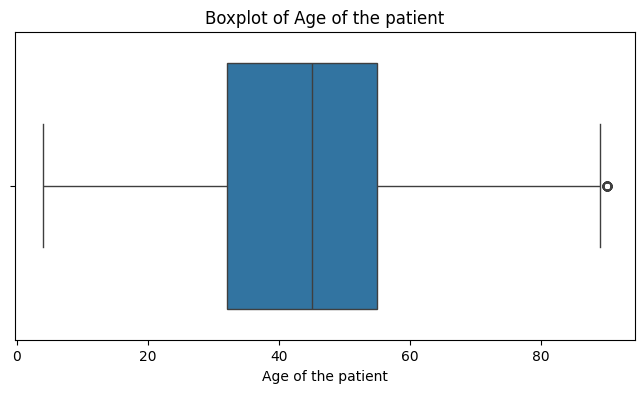

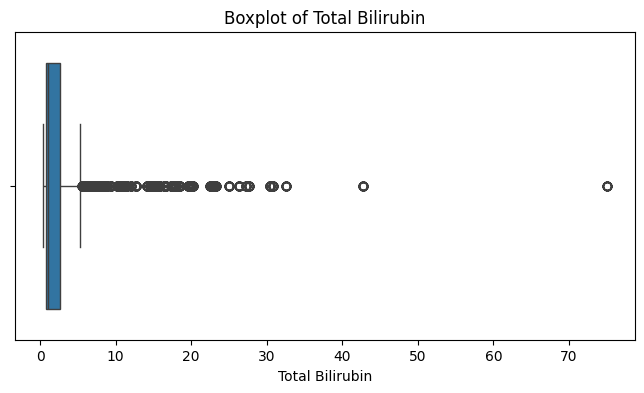

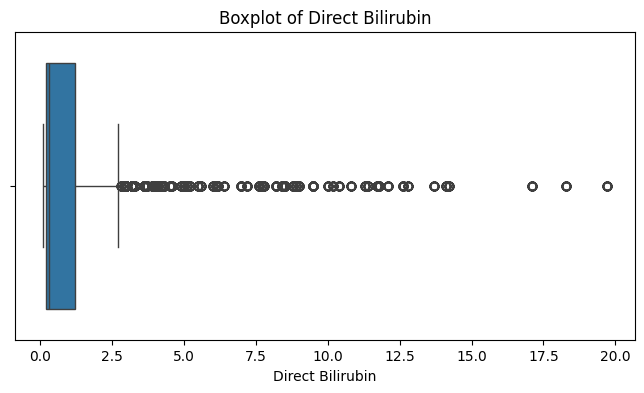

C:\Users\sohai\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 65440 (\N{HALFWIDTH HANGUL FILLER}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


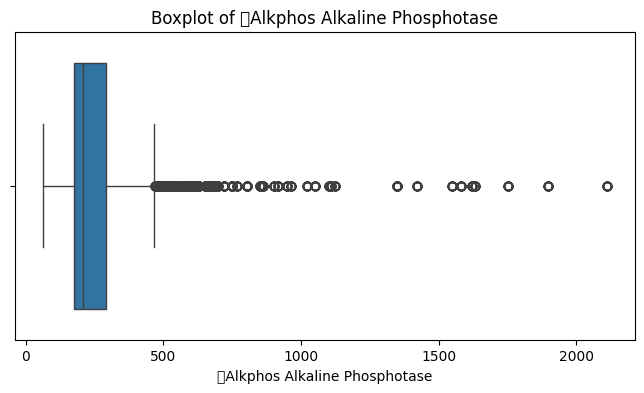

C:\Users\sohai\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 65440 (\N{HALFWIDTH HANGUL FILLER}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


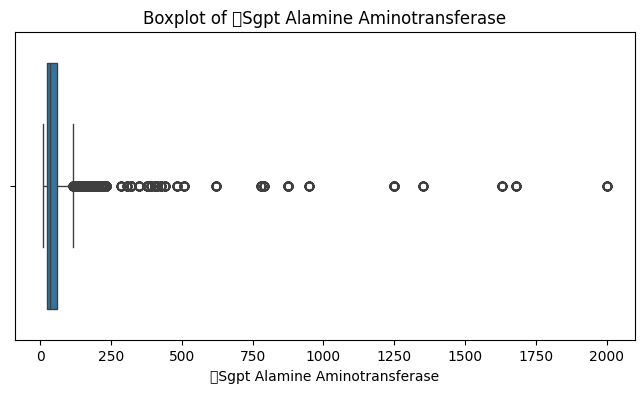

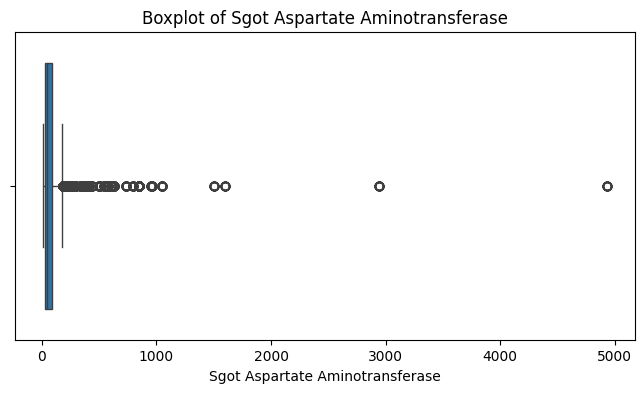

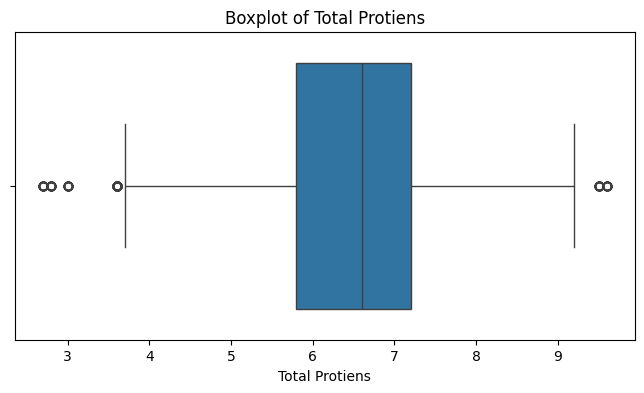

C:\Users\sohai\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 65440 (\N{HALFWIDTH HANGUL FILLER}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


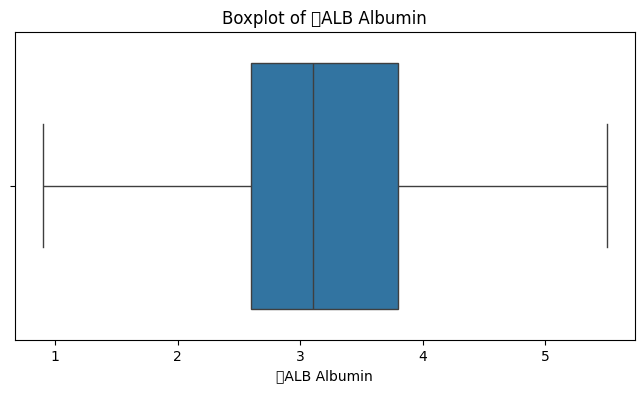

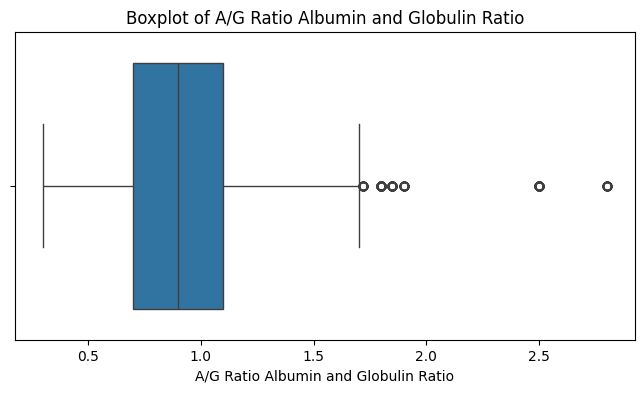

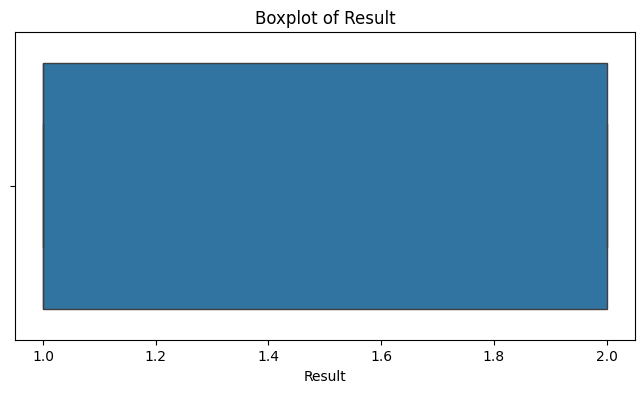

In [23]:
# Visualize outliers using boxplots
for col in numerical_columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

In [24]:
# Cap or remove outliers (use the 1.5 IQR rule)
for col in numerical_columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
    df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])

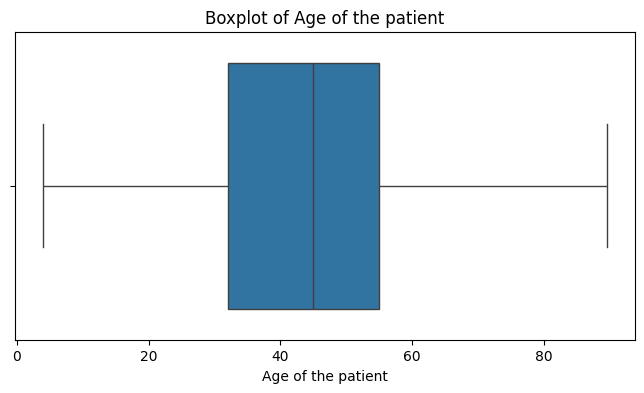

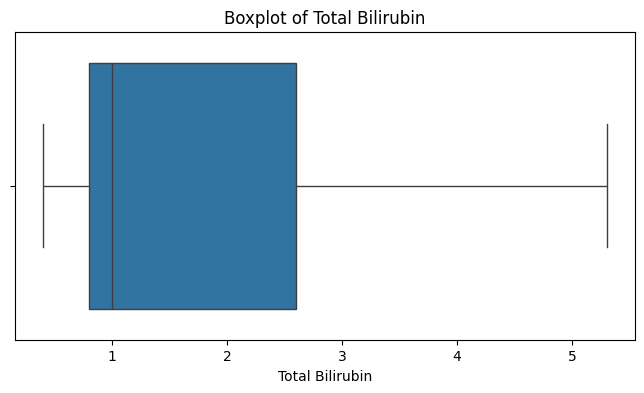

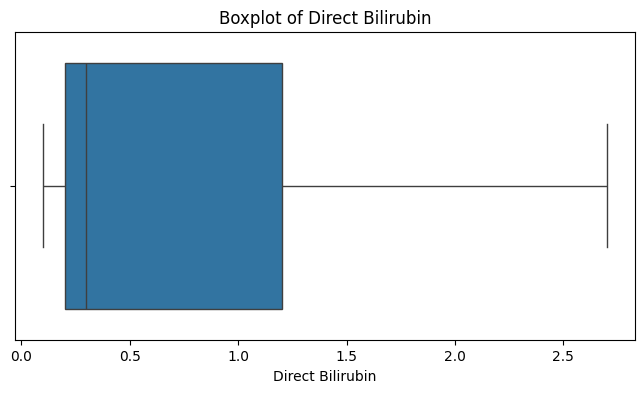

C:\Users\sohai\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 65440 (\N{HALFWIDTH HANGUL FILLER}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


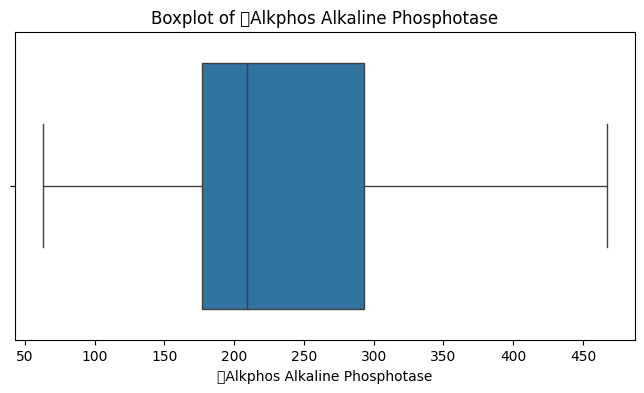

C:\Users\sohai\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 65440 (\N{HALFWIDTH HANGUL FILLER}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


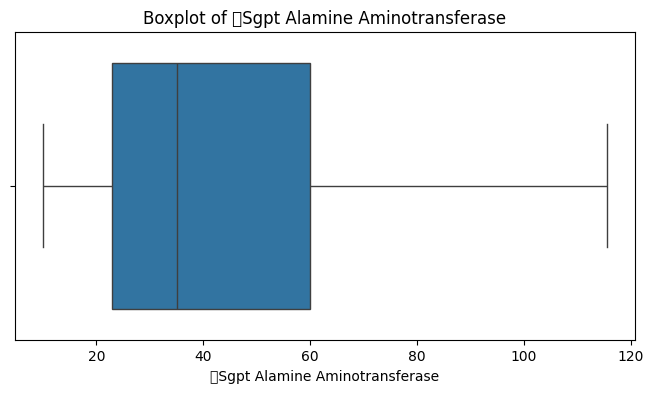

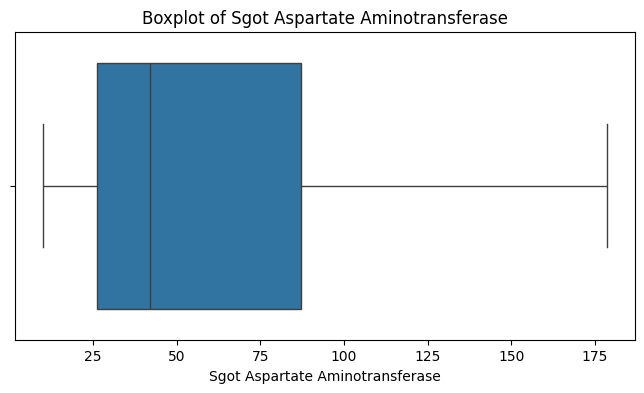

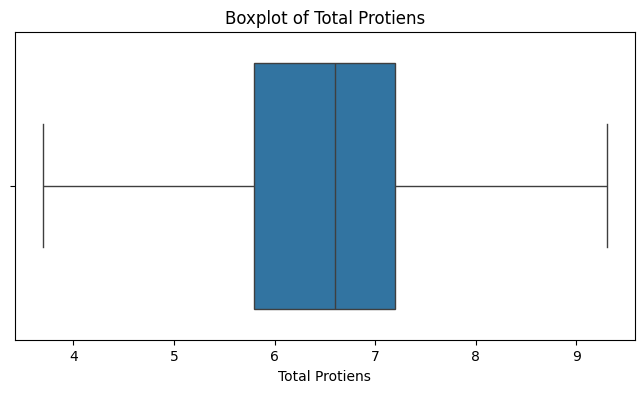

C:\Users\sohai\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 65440 (\N{HALFWIDTH HANGUL FILLER}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


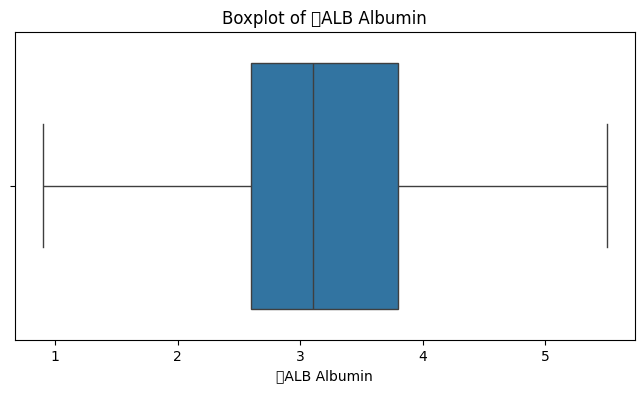

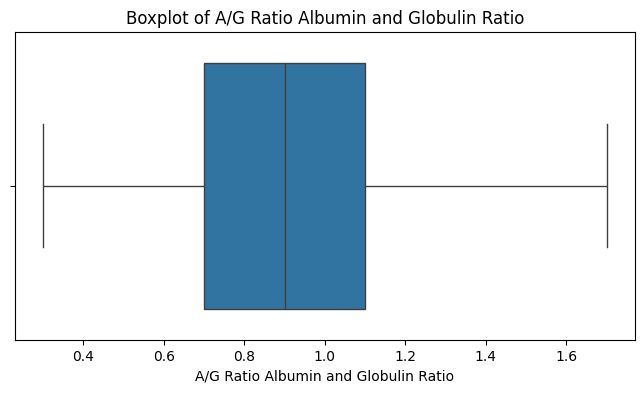

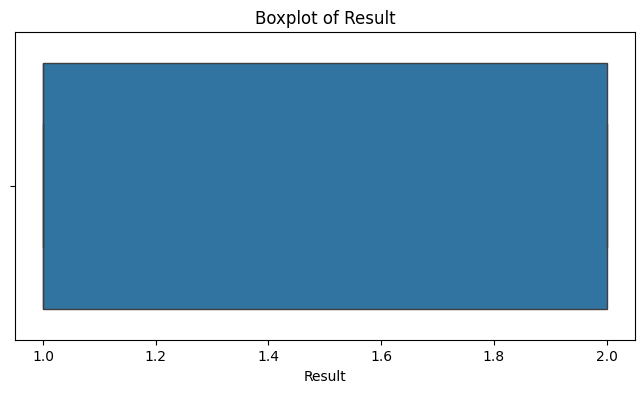

In [25]:
# Visualize outliers using boxplots
for col in numerical_columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

In [26]:
# Step 6: Encode Categorical Variables
# Check categorical columns
print("\nCategorical Columns:")
print(categorical_columns)



Categorical Columns:
Index(['Gender of the patient'], dtype='object')


In [27]:
# One-hot encode categorical variables (if present)
df = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19083 entries, 0 to 30689
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Age of the patient                    19083 non-null  float64
 1   Total Bilirubin                       19083 non-null  float64
 2   Direct Bilirubin                      19083 non-null  float64
 3   ﾠAlkphos Alkaline Phosphotase         19083 non-null  float64
 4   ﾠSgpt Alamine Aminotransferase        19083 non-null  float64
 5   Sgot Aspartate Aminotransferase       19083 non-null  float64
 6   Total Protiens                        19083 non-null  float64
 7   ﾠALB Albumin                          19083 non-null  float64
 8   A/G Ratio Albumin and Globulin Ratio  19083 non-null  float64
 9   Result                                19083 non-null  float64
 10  Gender of the patient_Male            19083 non-null  bool   
dtypes: bool(1), float64(

In [29]:
df.head(10)

,Age of the patient,Total Bilirubin,Direct Bilirubin,ﾠAlkphos Alkaline Phosphotase,ﾠSgpt Alamine Aminotransferase,Sgot Aspartate Aminotransferase,Total Protiens,ﾠALB Albumin,A/G Ratio Albumin and Globulin Ratio,Result,Gender of the patient_Male
0,65.0,0.7,0.1,187.0,16.0,18.0,6.8,3.3,0.90,1.0,False
1,62.0,5.3,2.7,467.0,64.0,100.0,7.5,3.2,0.74,1.0,True
2,62.0,5.3,2.7,467.0,60.0,68.0,7.0,3.3,0.89,1.0,True
3,58.0,1.0,0.4,182.0,14.0,20.0,6.8,3.4,1.00,1.0,True
4,72.0,3.9,2.0,195.0,27.0,59.0,7.3,2.4,0.40,1.0,True
5,46.0,1.8,0.7,208.0,19.0,14.0,7.6,4.4,1.30,1.0,True
6,26.0,0.9,0.2,154.0,35.0,12.0,7.0,3.5,1.00,1.0,False
7,29.0,0.9,0.3,202.0,14.0,11.0,6.7,3.6,1.10,1.0,False
8,17.0,0.9,0.3,202.0,22.0,19.0,7.4,4.1,1.20,2.0,True
9,55.0,0.7,0.2,290.0,53.0,58.0,6.8,3.4,1.00,1.0,True


In [30]:
# Step 7: Normalize/Scale Numerical Data
from sklearn.preprocessing import StandardScaler

In [31]:
scaler = StandardScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])


Cleaned dataset saved to: C:\Users\sohai\Desktop\CapStoneproject\Cleaned_LiverPatientDataset.csv
